In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.stats import gaussian_kde
from torchvision.transforms import Compose
from src.datasets.tools.transforms import LoadNP, CloudAngleNormalize
from src.datasets.tools.transforms import Corruption, GlobalShift
from src.datasets.dublin.config import config as dublin_config
import h5py

# for dark-mode
# COLOR = 'white'
# matplotlib.rcParams['text.color'] = COLOR
# matplotlib.rcParams['axes.labelcolor'] = COLOR
# matplotlib.rcParams['xtick.color'] = COLOR
# matplotlib.rcParams['ytick.color'] = COLOR

# more readable font size?
matplotlib.rcParams.update({'font.size': 18})
dataset_path = Path("../dublin/data/150/dataset.h5")

In [2]:
# confirm that our files exist, and that the number of examples is in line with
#   our expectations. This also shows the number of source-target pairs. 


with h5py.File(dataset_path, "a") as f:
    example_counts = {}
    for i in range(0, f['train'].shape[0]):
        src, target = f['train'][i][-1, 8], f['train'][i][0, 8]
        if (src, target) not in example_counts:
            example_counts[(src, target)] = 1
        else:
            example_counts[(src, target)] += 1

totals = []
idx = 0
# some pretty formatting
for key, val in example_counts.items():
    print(f"{key}: {val}", end='  ')
    totals.append(val)
    if idx % 4 == 3:
        print()
    idx+=1
print()

print(f"Mean: {np.mean(totals)}\tStd: {np.std(totals)}")

(9.0, 1.0): 39616  (9.0, 9.0): 39858  (14.0, 9.0): 32673  (14.0, 14.0): 39664  

Mean: 37952.75	Std: 3049.611235469203


In [7]:
x = 10
y = 4
matplotlib.rcParams['figure.figsize'] = [x*1.5, y*1.5]

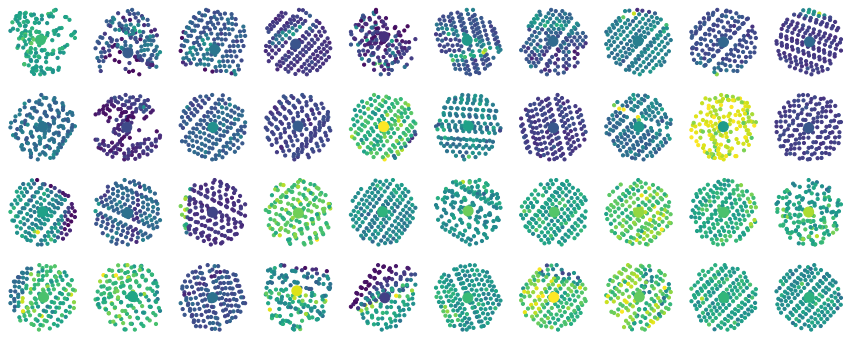

In [8]:
# Visualize Intenties
with h5py.File(dataset_path, "a") as f:
    sample = np.random.choice(f['train'].shape[0], (x, y))
    fig, ax = plt.subplots(y, x)
    for i in range(y):
        for j in range(x):
            example = f['train'][sample[j, i]]
            example = np.flip(example, axis=0)  # reverse so center pt is on top
            # Adjust the gt-center to be more visible
            center = np.ones((example.shape[0])) * 10
            center[-1] = 100
            intensity = example[:, 3]
            intensity[-1] += .1
            s = ax[i][j].scatter(example[:, 0], example[:, 1], s=center, c=example[:, 3], vmin=0, vmax=1)
            ax[i][j].axis('off')

# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
# fig.colorbar(s, cax=cbar_ax)

plt.show()